<a href="https://colab.research.google.com/github/IsaacMartindeDiego/IA/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entender el problema**

Los datos están relacionados con las campañas de marketing directo de una entidad bancaria portuguesa. El objetivo del análisis es realizar una agrupación (Clustering) de clientes en base a atributos.

# **Datos** 

Sólo se utilizan atributos categóricos del conjunto de datos de marketing bancario (repositorio UCI: https://archive.ics.uci.edu/ml/datasets/bank+marketing) para el ejercicio planteado en este cuaderno.

# **Información de las variables de interés**:

Toda las variables son categóricas.

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

UCI Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing

# **Obtención y comprensión de datos**

En primer lugar cargamos algunas librerías necesarias para el análisis de datos. 

A continuación leemos los datos.

In [69]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd

# Librerías para la visualziación de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [70]:
# Cargamos los datos
bank = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv')
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [71]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [72]:
# Importar columnas categóricas
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','poutcome']]
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,poutcome
0,59,admin.,married,secondary,no,yes,no,unknown,may,unknown
1,56,admin.,married,secondary,no,no,no,unknown,may,unknown
2,41,technician,married,secondary,no,yes,no,unknown,may,unknown
3,55,services,married,secondary,no,yes,no,unknown,may,unknown
4,54,admin.,married,tertiary,no,no,no,unknown,may,unknown


#**Ingeniería de características**

Vamos a convertir la edad en variable categórica.

In [73]:
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)
bank_cust.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,50-60
1,admin.,married,secondary,no,no,no,unknown,may,unknown,50-60
2,technician,married,secondary,no,yes,no,unknown,may,unknown,40-50
3,services,married,secondary,no,yes,no,unknown,may,unknown,50-60
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,50-60


# **Análisis Exploratorio**


In [74]:
bank_cust.shape

(11162, 10)

In [75]:
bank_cust.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,9
top,management,married,secondary,no,no,no,cellular,may,unknown,30-40
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,4188


In [76]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   job        11162 non-null  object  
 1   marital    11162 non-null  object  
 2   education  11162 non-null  object  
 3   default    11162 non-null  object  
 4   housing    11162 non-null  object  
 5   loan       11162 non-null  object  
 6   contact    11162 non-null  object  
 7   month      11162 non-null  object  
 8   poutcome   11162 non-null  object  
 9   age_bin    11162 non-null  category
dtypes: category(1), object(9)
memory usage: 796.2+ KB


#**Limpieza y Depuración de datos**

Chequemamos la existencia de valores faltantes.

In [77]:
bank_cust.isnull().sum()*100/bank_cust.shape[0]

job          0.0
marital      0.0
education    0.0
default      0.0
housing      0.0
loan         0.0
contact      0.0
month        0.0
poutcome     0.0
age_bin      0.0
dtype: float64

Podemos decir que los datos están limpios puesto que no hay valores faltantes.


# **Modelización**

Ajustamos un modelo de K-modas a modo de ejemplo.

In [78]:
# Copia de los datos
bank_cust_copy = bank_cust.copy()

# Preprocesado
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
0,0,1,1,0,1,0,2,8,3,4
1,0,1,1,0,0,0,2,8,3,4
2,9,1,1,0,1,0,2,8,3,3
3,7,1,1,0,1,0,2,8,3,4
4,0,1,2,0,0,0,2,8,3,4


In [79]:
# Importamos librerías
from sklearn.cluster import KMeans

In [80]:
 kmeans = KMeans(n_clusters=2, random_state=0).fit(bank_cust)
 kmeans.labels_


array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [81]:
 prediction = kmeans.predict(bank_cust)

In [82]:
kmeans.cluster_centers_

array([[5.6482743 , 1.22093551, 1.35921889, 0.01339691, 0.31380563,
        0.11307902, 0.14327884, 2.13828338, 2.46639419, 2.6260218 ],
       [3.73172536, 1.18526191, 1.23690441, 0.01612903, 0.57694584,
        0.14234981, 0.71544836, 7.6010654 , 2.48520272, 2.52929861]])

# **Evaluación**



Combining the predicted clusters with the original Data Frame

In [83]:
bank_cust = bank_cust_copy.reset_index()

In [84]:
clustersDf = pd.DataFrame(prediction)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [85]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin,cluster_predicted
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,50-60,1
1,admin.,married,secondary,no,no,no,unknown,may,unknown,50-60,1
2,technician,married,secondary,no,yes,no,unknown,may,unknown,40-50,1
3,services,married,secondary,no,yes,no,unknown,may,unknown,50-60,1
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,50-60,1


## **Identificación de los clusters**

In [86]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [87]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4404 entries, 204 to 11161
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                4404 non-null   object  
 1   marital            4404 non-null   object  
 2   education          4404 non-null   object  
 3   default            4404 non-null   object  
 4   housing            4404 non-null   object  
 5   loan               4404 non-null   object  
 6   contact            4404 non-null   object  
 7   month              4404 non-null   object  
 8   poutcome           4404 non-null   object  
 9   age_bin            4404 non-null   category
 10  cluster_predicted  4404 non-null   int32   
dtypes: category(1), int32(1), object(9)
memory usage: 365.9+ KB


In [88]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6758 entries, 0 to 11160
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                6758 non-null   object  
 1   marital            6758 non-null   object  
 2   education          6758 non-null   object  
 3   default            6758 non-null   object  
 4   housing            6758 non-null   object  
 5   loan               6758 non-null   object  
 6   contact            6758 non-null   object  
 7   month              6758 non-null   object  
 8   poutcome           6758 non-null   object  
 9   age_bin            6758 non-null   category
 10  cluster_predicted  6758 non-null   int32   
dtypes: category(1), int32(1), object(9)
memory usage: 561.3+ KB


Analizamos la variable *Job* y cómo se distribuye en los diferentes clusters.

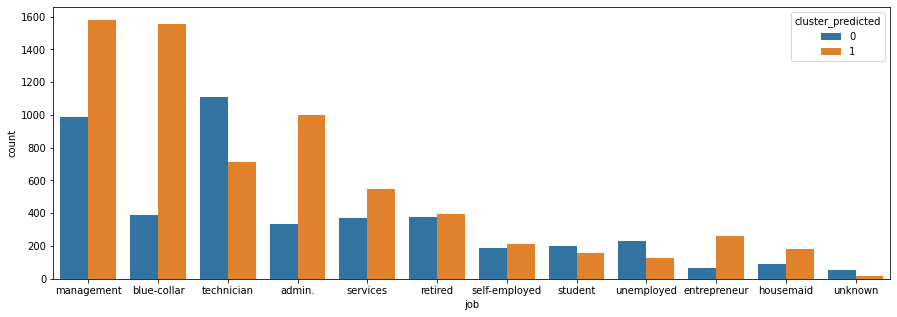

In [89]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['job'],order=combinedDf['job'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

Ahora pasamos a la variable *Marital*

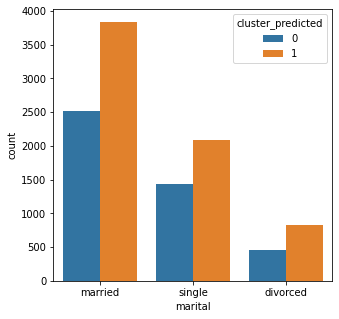

In [90]:
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['marital'],order=combinedDf['marital'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

Variable *Education*

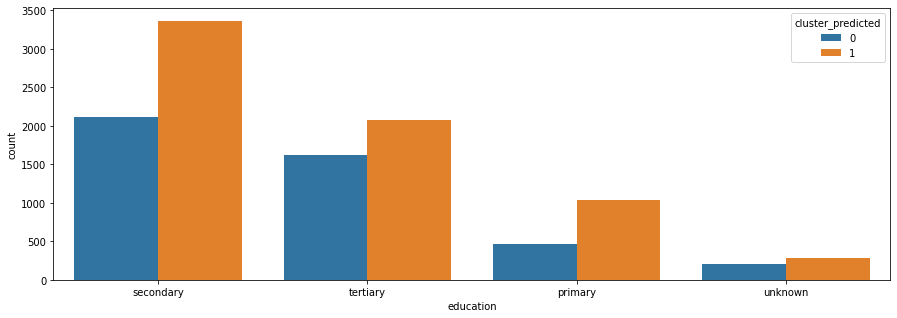

In [91]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['education'],order=combinedDf['education'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

Y el resto de variables.

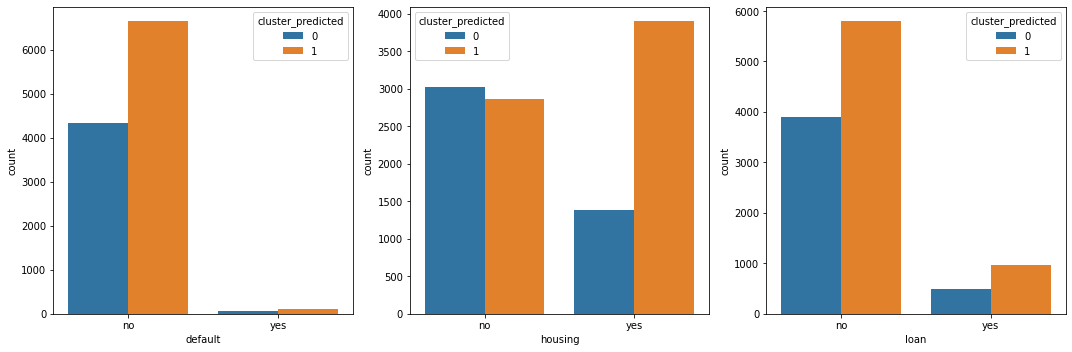

In [92]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['default'],order=combinedDf['default'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['housing'],order=combinedDf['housing'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['loan'],order=combinedDf['loan'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

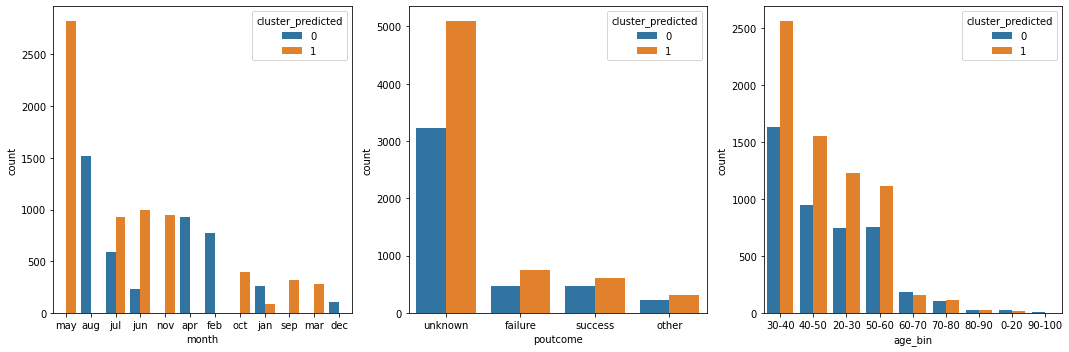

In [96]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['month'],order=combinedDf['month'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['poutcome'],order=combinedDf['poutcome'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])


plt.tight_layout()
plt.show()

---
**DSLAB- Isaac Martín de Diego - 2022**


